In [ ]:
import numpy as np
from cvxopt import matrix, solvers

# Define the features and labels
# Apples are labeled as 1, oranges as -1
X = np.array([
    [1, 7.0, 180, 1],  # Apple
    [1, 6.5, 175, 1],  # Apple
    [0, 7.5, 150, 0],  # Orange
    [0, 7.8, 155, 0]   # Orange
])
d = np.array([1, 1, -1, -1]).astype(float)  # Labels: 1 for apple, -1 for orange

# Number of data points and features
m, n = X.shape
print(m,n)

# Calculate the Gram matrix (K) using element-wise multiplication
K = (d[:, None] * d[None, :]) * np.dot(X, X.T)

print('X\n',X)
print('K\n',K)
# Convert to cvxopt format
P = matrix(K)
q = matrix(-np.ones((m, 1)))
print("npeye\n",np.eye(m))
G = matrix(-np.eye(m)) # eye create idetntity matrix

h = matrix(np.zeros((m, 1)))
A = matrix(d.reshape(1, -1))
b = matrix(0.0)

# Solve the QPP using cvxopt
solvers.options['show_progress'] = True
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Select support vectors (where alpha > 1e-5)
support_vector_indices = alphas > 1e-5
support_alphas = alphas[support_vector_indices]
support_vectors = X[support_vector_indices]
support_labels = d[support_vector_indices]

# Calculate the weight vector w
w = np.sum((support_alphas[:, None] * support_labels[:, None]) * support_vectors, axis=0)

# Calculate the bias term b using the support vectors
b = np.mean([d_k - np.dot(w, x_k) for (d_k, x_k) in zip(support_labels, support_vectors)])

print("Weight vector (w):", w)
print("Bias (b):", b)

# Define a function to make predictions
def predict(x):
  return np.sign(np.dot(w, x) + b)

# Test the SVM with a new fruit
new_fruit = np.array([1, 6.9, 178, 1])
prediction = predict(new_fruit)

# Interpret the prediction result
fruit_type = "Apple" if prediction == 1 else "Orange"
print("Prediction for the new fruit:", fruit_type)

# Display support vectors and their indices
print("Support vectors:", support_vectors)
print("Indices of support vectors:", np.where(support_vector_indices)[0])


4 4
X
 [[  1.    7.  180.    1. ]
 [  1.    6.5 175.    1. ]
 [  0.    7.5 150.    0. ]
 [  0.    7.8 155.    0. ]]
K
 [[ 32451.    31547.5  -27052.5  -27954.6 ]
 [ 31547.5   30669.25 -26298.75 -27175.7 ]
 [-27052.5  -26298.75  22556.25  23308.5 ]
 [-27954.6  -27175.7   23308.5   24085.84]]
npeye
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
     pcost       dcost       gap    pres   dres
 0: -9.6429e-02 -1.5278e-01  5e+00  2e+00  1e+00
 1: -5.3175e-02 -2.4344e-02  3e-01  1e-01  8e-02
 2: -1.8194e-03 -1.4621e-02  1e-02  3e-18  3e-13
 3: -4.6898e-03 -5.9626e-03  1e-03  2e-18  2e-14
 4: -4.9382e-03 -4.9676e-03  3e-05  9e-19  1e-14
 5: -4.9541e-03 -4.9544e-03  3e-07  9e-19  2e-14
 6: -4.9543e-03 -4.9543e-03  3e-09  1e-18  2e-14
Optimal solution found.
Weight vector (w): [ 0.0049543  -0.00644058  0.09908608  0.0049543 ]
Bias (b): -16.3081067688804
Prediction for the new fruit: Apple
Support vectors: [[  1.    6.5 175.    1. ]
 [  0.    7.8 155.    0. ]]
Indices of support v

`solvers.qp` is a function from the **CVXOPT** library used to solve **Quadratic Programming (QP) problems**. Quadratic programming is an optimization problem where the objective function is quadratic, and the constraints are linear. This type of problem is common in optimization tasks like Support Vector Machines (SVM) and portfolio optimization.

---

### Quadratic Programming Problem


Quadratic programming problem is formulated as:

$\text{minimize } \frac{1}{2} x^T P x + q^T x$
subject to:

$Gx \leq h$


$Ax = b$


where:
- $ x$ is the vector of variables to be optimized.
- $ P $ is a symmetric positive semi-definite matrix that defines the quadratic part of the objective function.
- $ q $ is a vector that defines the linear part of the objective function.
- $ G $ and $h$ define the inequality constraints.
- $ A $ and $ b $ define the equality constraints.


### Using `solvers.qp` in CVXOPT

#### Syntax
```python
from cvxopt import matrix, solvers

solution = solvers.qp(P, q, G, h, A, b)
```

- **P**: A symmetric positive semi-definite matrix that defines the quadratic part of the objective function. This must be provided as a `cvxopt` matrix.
- **q**: A vector that defines the linear part of the objective function. This must be provided as a `cvxopt` matrix.
- **G**: A matrix defining the inequality constraints \( Gx \leq h \). This must be a `cvxopt` matrix.
- **h**: A vector defining the right-hand side of the inequality constraints. This must be a `cvxopt` matrix.
- **A**: A matrix defining the equality constraints \( Ax = b \). This is optional and must be a `cvxopt` matrix if provided.
- **b**: A vector defining the right-hand side of the equality constraints. This is optional and must be a `cvxopt` matrix if provided.


In [ ]:
import numpy as np
from sklearn import svm

# Define the features and labels
# Apples are labeled as 1, oranges as -1
X = np.array([
    [1, 7.0, 180, 1],  # Apple
    [1, 6.5, 175, 1],  # Apple
    [0, 7.5, 150, 0],  # Orange
    [0, 7.8, 155, 0]   # Orange
])
d = np.array([1, 1, -1, -1])  # Labels: 1 for apple, -1 for orange

# Initialize the SVM classifier with a linear kernel
# Linear kernel is specified for simplicity; can use other kernels (e.g., 'rbf') if needed
clf = svm.SVC(kernel='linear', C=1.0)

# Train the SVM model
clf.fit(X, d)

# Display the weights (w) and bias (b)
w = clf.coef_
b = clf.intercept_
print("Weight vector (w):", w)
print("Bias (b):", b)

# Make a prediction for a new fruit
# Example fruit with color=1, diameter=6.9, weight=178, skin texture=1 (unknown label)
new_fruit = np.array([[1, 6.9, 178, 1]])
prediction = clf.predict(new_fruit)

# Interpret the prediction result
fruit_type = "Apple" if prediction[0] == 1 else "Orange"
print("Prediction for the new fruit:", fruit_type)

# Display support vectors
print("Support vectors:", clf.support_vectors_)
print("Indices of support vectors:", clf.support_)
print("Number of support vectors for each class:", clf.n_support_)


Weight vector (w): [[ 0.00495428 -0.00644056  0.09908555  0.00495428]]
Bias (b): [-16.3080202]
Prediction for the new fruit: Apple
Support vectors: [[  0.    7.8 155.    0. ]
 [  1.    6.5 175.    1. ]]
Indices of support vectors: [3 1]
Number of support vectors for each class: [1 1]


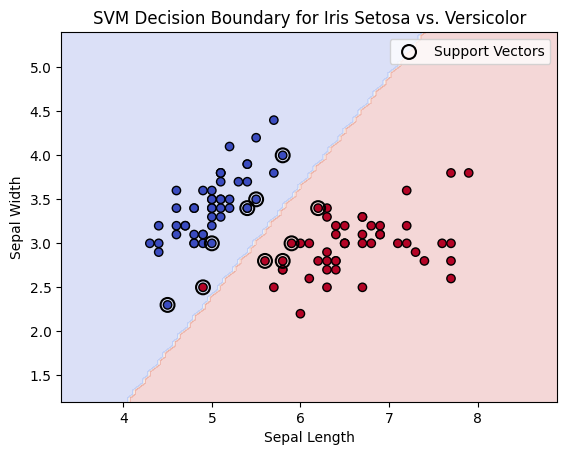

Test Accuracy: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length, sepal width)
y = iris.target

# To make it a binary classification problem, we’ll filter out one of the classes
# Select only Versicolor (1) and Virginica (2) Setosa (0)
X = X[y != 1]  # Remove one
y = y[y != 1]  # Remove one

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model (we'll use a linear kernel for simplicity)
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Set up a grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # Plot settings
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title("SVM Decision Boundary for Iris Setosa vs. Versicolor")
    plt.show()

# Plot the decision boundary and support vectors
plot_decision_boundary(model, X, y)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


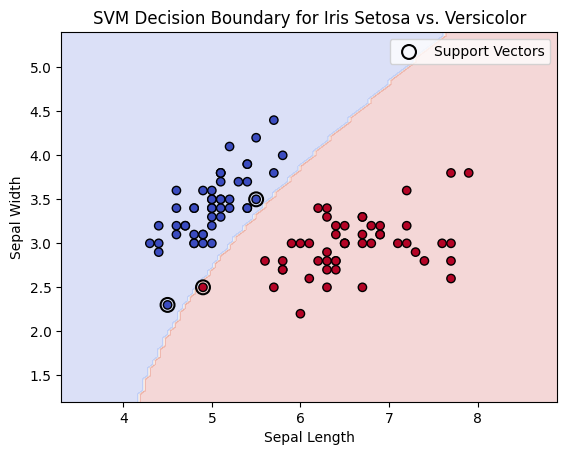

Test Accuracy: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length, sepal width)
y = iris.target

# To make it a binary classification problem, we’ll filter out one of the classes
# Select only Versicolor (1) and Virginica (2) Setosa (0)
X = X[y != 1]  # Remove Versicolor
y = y[y != 1]  # Remove Versicolor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='poly', C=1.0) # poly, rbf
model.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Set up a grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # Plot settings
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title("SVM Decision Boundary for Iris Setosa vs. Versicolor")
    plt.show()

# Plot the decision boundary and support vectors
plot_decision_boundary(model, X, y)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


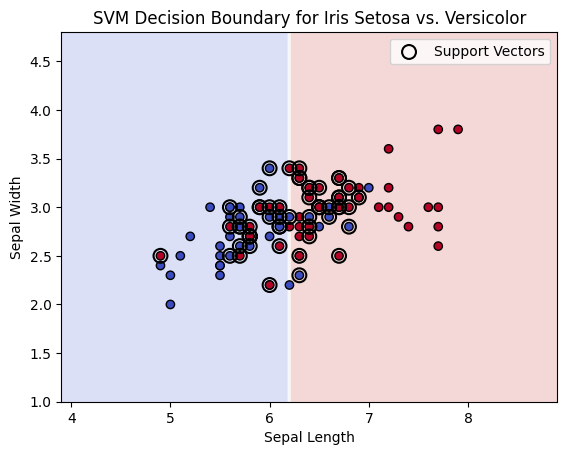

Test Accuracy: 0.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length, sepal width)
y = iris.target

# To make it a binary classification problem, we’ll filter out one of the classes
# Select only Versicolor (1) and Virginica (2)
X = X[y != 0]  # Remove Setosa
y = y[y != 0]  # Remove Setosa

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model (we'll use a linear kernel for simplicity)
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Set up a grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # Plot settings
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title("SVM Decision Boundary for Iris Setosa vs. Versicolor")
    plt.show()

# Plot the decision boundary and support vectors
plot_decision_boundary(model, X, y)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


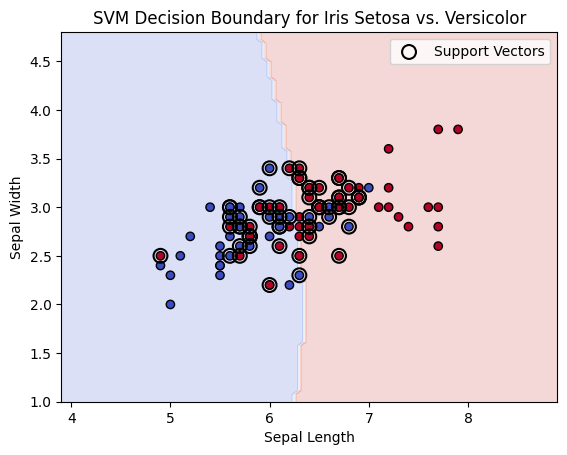

Test Accuracy: 0.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (sepal length, sepal width)
y = iris.target

# To make it a binary classification problem, we’ll filter out one of the classes
# Select only Versicolor (1) and Virginica (2)
X = X[y != 0]  # Remove Setosa
y = y[y != 0]  # Remove Setosa

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Set up a grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    # Plot settings
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title("SVM Decision Boundary for Iris Setosa vs. Versicolor")
    plt.show()

# Plot the decision boundary and support vectors
plot_decision_boundary(model, X, y)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


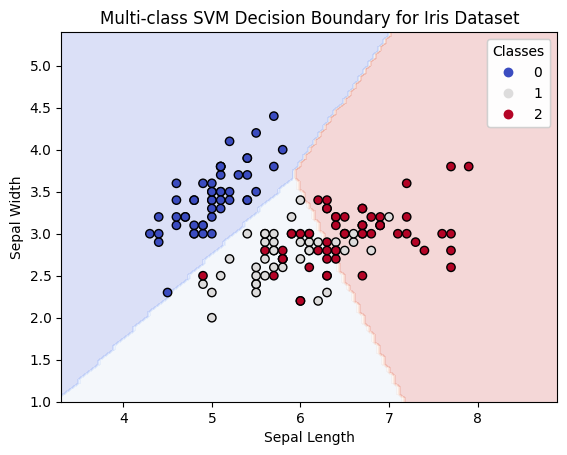

Test Accuracy: 0.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using the first two features for visualization (sepal length, sepal width)
y = iris.target  # Three classes: Setosa (0), Versicolor (1), and Virginica (2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with a linear kernel
model = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')  # 'ovo' is default for multi-class
#"one-vs-all" approach
model.fit(X_train, y_train)

# Visualize the decision boundaries
def plot_decision_boundary(model, X, y):
    # Set up the grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries and margins
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Legend for classes
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)

    # Support vectors are not explicitly plotted here as multi-class SVM has multiple boundaries
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title("Multi-class SVM Decision Boundary for Iris Dataset")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



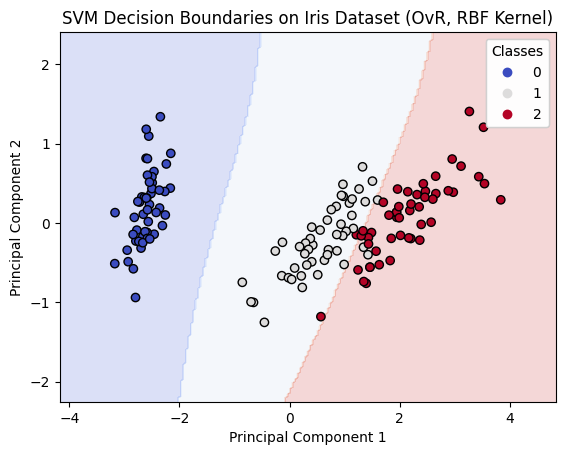

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Using all four features: sepal length, sepal width, petal length, petal width
y = iris.target  # Three classes: Setosa (0), Versicolor (1), Virginica (2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with RBF kernel and One-vs-Rest (OvR) approach
model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr') # rbf, poly
model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the decision boundary in 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = np.vstack((X_train_pca, X_test_pca))
y_full = np.hstack((y_train, y_test))

# Re-train the model on the PCA-reduced data for visualization purposes
model_pca = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
model_pca.fit(X_train_pca, y_train)

# Plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

# Plot the original data points with PCA-reduced features
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_full, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("SVM Decision Boundaries on Iris Dataset (OvR, RBF Kernel)")

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)
plt.show()


Neuron

In [ ]:
import numpy as np

# Initialize inputs, weights, and bias
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
w = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
b = 0.1
y_true = 10
alpha = 0.01  # Leaky ReLU parameter
eta = 0.01  # Learning rate

# Leaky ReLU activation function
def leaky_relu(z, alpha=0.01):
    return z if z > 0 else alpha * z

# Leaky ReLU derivative function
def leaky_relu_derivative(z, alpha=0.01):
    return 1 if z > 0 else alpha

# Perform 5 iterations of backpropagation
for iteration in range(5):
    # Forward pass: compute the weighted sum
    z = np.dot(w, x) + b
    y_pred = leaky_relu(z, alpha)

    # Compute the loss
    loss = 0.5 * (y_pred - y_true) ** 2
    print(f"Iteration {iteration + 1}: Loss = {loss}")

    # Backward pass: compute gradients
    d_loss_d_ypred = y_pred - y_true
    d_ypred_d_z = leaky_relu_derivative(z, alpha)

    # Gradient of the loss with respect to z
    d_loss_d_z = d_loss_d_ypred * d_ypred_d_z

    # Gradients of the loss with respect to weights and bias
    d_loss_d_w = d_loss_d_z * x
    d_loss_d_b = d_loss_d_z

    # Update weights and bias
    w -= eta * d_loss_d_w
    b -= eta * d_loss_d_b

    print(f"Updated weights: {w}")
    print(f"Updated bias: {b}\n")


Iteration 1: Loss = 9.680000000000001
Updated weights: [0.144 0.288 0.432 0.576 0.72 ]
Updated bias: 0.14400000000000002

Iteration 2: Loss = 1.874048
Updated weights: [0.16336 0.32672 0.49008 0.65344 0.8168 ]
Updated bias: 0.16336

Iteration 3: Loss = 0.36281569279999937
Updated weights: [0.1718784 0.3437568 0.5156352 0.6875136 0.859392 ]
Updated bias: 0.1718784

Iteration 4: Loss = 0.07024111812607961
Updated weights: [0.1756265  0.35125299 0.52687949 0.70250598 0.87813248]
Updated bias: 0.17562649599999997

Iteration 5: Loss = 0.013598680469209482
Updated weights: [0.17727566 0.35455132 0.53182697 0.70910263 0.88637829]
Updated bias: 0.17727565824



In [ ]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Parameters
x1, x2 = 0.5, 0.3       # Inputs
target = 1               # Desired output
w1, w2 = 0.4, 0.6        # Initial weights
b = 0.1                  # Initial bias
learning_rate = 0.5      # Learning rate
epochs = 20            # Number of epochs

# Training loop
for epoch in range(epochs):
    # Step 1: Forward pass - calculate weighted sum and output
    z = w1 * x1 + w2 * x2 + b
    output = sigmoid(z)

    # Step 2: Calculate the loss (Mean Squared Error)
    loss = (target - output) ** 2

    # Step 3: Backpropagation - calculate gradients
    # Gradient of loss with respect to output
    d_loss_output = -2 * (target - output)

    # Gradient of output with respect to z (sigmoid derivative)
    d_output_z = sigmoid_derivative(z)

    # Gradients for each parameter
    d_loss_w1 = d_loss_output * d_output_z * x1
    d_loss_w2 = d_loss_output * d_output_z * x2
    d_loss_b = d_loss_output * d_output_z

    # Step 4: Update weights and bias
    w1 -= learning_rate * d_loss_w1
    w2 -= learning_rate * d_loss_w2
    b -= learning_rate * d_loss_b

    # Print values for each epoch
    print(f"Epoch {epoch + 1}")
    print(f"  w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")
    print(f"  Output: {output:.4f}")
    print(f"  Loss: {loss:.4f}\n")


Epoch 1
  w1: 0.4451, w2: 0.6271, b: 0.1903
  Output: 0.6177
  Loss: 0.1461

Epoch 2
  w1: 0.4856, w2: 0.6514, b: 0.2713
  Output: 0.6459
  Loss: 0.1254

Epoch 3
  w1: 0.5221, w2: 0.6732, b: 0.3441
  Output: 0.6703
  Loss: 0.1087

Epoch 4
  w1: 0.5550, w2: 0.6930, b: 0.4099
  Output: 0.6915
  Loss: 0.0952

Epoch 5
  w1: 0.5848, w2: 0.7109, b: 0.4697
  Output: 0.7100
  Loss: 0.0841

Epoch 6
  w1: 0.6121, w2: 0.7272, b: 0.5241
  Output: 0.7262
  Loss: 0.0750

Epoch 7
  w1: 0.6370, w2: 0.7422, b: 0.5740
  Output: 0.7404
  Loss: 0.0674

Epoch 8
  w1: 0.6599, w2: 0.7560, b: 0.6199
  Output: 0.7531
  Loss: 0.0610

Epoch 9
  w1: 0.6812, w2: 0.7687, b: 0.6623
  Output: 0.7643
  Loss: 0.0555

Epoch 10
  w1: 0.7009, w2: 0.7805, b: 0.7017
  Output: 0.7744
  Loss: 0.0509

Epoch 11
  w1: 0.7192, w2: 0.7915, b: 0.7385
  Output: 0.7835
  Loss: 0.0469

Epoch 12
  w1: 0.7364, w2: 0.8018, b: 0.7728
  Output: 0.7918
  Loss: 0.0434

Epoch 13
  w1: 0.7525, w2: 0.8115, b: 0.8050
  Output: 0.7992
  Loss: 0.0

Feed-forward neural network with three layers:

    First Layer: 4 neurons
    Second Layer: 8 neurons
    Third Layer: 2 neurons
    Output Layer: A single output using the Leaky ReLU activation function

In [ ]:
import numpy as np

# Leaky ReLU activation function
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

# Number of neurons in each layer
input_size = 5  # Number of inputs
layer1_neurons = 4
layer2_neurons = 8
layer3_neurons = 2
output_neurons = 1  # Single output

# Initialize random inputs
x = np.random.randn(input_size)

print('x ', x)
# Initialize random weights and biases for each layer
np.random.seed(42)  # For reproducibility
weights_layer1 = np.random.randn(input_size, layer1_neurons)
bias_layer1 = np.random.randn(layer1_neurons)
print('weights_layer1 ', weights_layer1)
print('bias_layer1 ', bias_layer1)
print('-'*40)
weights_layer2 = np.random.randn(layer1_neurons, layer2_neurons)
bias_layer2 = np.random.randn(layer2_neurons)
print('weights_layer2 ', weights_layer2)
print('bias_layer2 ', bias_layer2)
print('-'*40)

weights_layer3 = np.random.randn(layer2_neurons, layer3_neurons)
bias_layer3 = np.random.randn(layer3_neurons)
print('weights_layer3 ', weights_layer3)
print('bias_layer3 ', bias_layer3)
print('-'*40)

weights_output = np.random.randn(layer3_neurons, output_neurons)
bias_output = np.random.randn(output_neurons)
print('weights_output ', weights_output)
print('bias_output ', bias_output)
print('-'*40)


# Forward pass through the first layer
z1 = np.dot(x, weights_layer1) + bias_layer1
print('z1 ',z1)
a1 = leaky_relu(z1)
print('a1 ', a1)
print('-'*40)
# Forward pass through the second layer
z2 = np.dot(a1, weights_layer2) + bias_layer2
a2 = leaky_relu(z2)
print('z2 ',z2)
print('a2 ', a2)
print('-'*40)
# Forward pass through the third layer
z3 = np.dot(a2, weights_layer3) + bias_layer3
a3 = leaky_relu(z3)
print('z3 ',z3)
print('a3 ', a3)
print('-'*40)

# Output layer
z_output = np.dot(a3, weights_output) + bias_output
output = leaky_relu(z_output)
print('z_output', z_output)

print("Input:", x)
print("Output of the network:", output)


x  [-1.71967831 -2.32841404  0.99702446 -1.68840021 -1.66450318]
weights_layer1  [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
bias_layer1  [ 1.46564877 -0.2257763   0.0675282  -1.42474819]
----------------------------------------
weights_layer2  [[-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818]
 [-0.01349722 -1.05771093  0.82254491 -1.22084365  0.2088636  -1.95967012
  -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223]
 [ 0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
   1.03099952  0.93128012]]
bias_layer2  [-0.83921752 -0.30921238  0.33126343  0.97554513 -0.47917424 -0.18565898
 -1.10633497 -1.19620662]
--------------------------

Now let us add back propogation to the above code

In [ ]:
import numpy as np

# Leaky ReLU activation function
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

# Derivative of Leaky ReLU
def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

# Initialize parameters
np.random.seed(42)  # For reproducibility
input_size = 5
layer1_neurons = 4
layer2_neurons = 8
layer3_neurons = 2
output_neurons = 1

# Random input
x = np.random.randn(input_size)
y_true = np.array([1.0])  # Target output

# Initialize weights and biases
weights_layer1 = np.random.randn(input_size, layer1_neurons)
bias_layer1 = np.random.randn(layer1_neurons)

weights_layer2 = np.random.randn(layer1_neurons, layer2_neurons)
bias_layer2 = np.random.randn(layer2_neurons)

weights_layer3 = np.random.randn(layer2_neurons, layer3_neurons)
bias_layer3 = np.random.randn(layer3_neurons)

weights_output = np.random.randn(layer3_neurons, output_neurons)
bias_output = np.random.randn(output_neurons)

# Learning rate
learning_rate = 0.5

# Training loop for  epochs
for epoch in range(50):
    # Forward pass
    z1 = np.dot(x, weights_layer1) + bias_layer1
    a1 = leaky_relu(z1)

    z2 = np.dot(a1, weights_layer2) + bias_layer2
    a2 = leaky_relu(z2)

    z3 = np.dot(a2, weights_layer3) + bias_layer3
    a3 = leaky_relu(z3)

    z_output = np.dot(a3, weights_output) + bias_output
    y_pred = leaky_relu(z_output)

    # Compute the loss (Mean Squared Error)
    loss = 0.5 * (y_pred - y_true) ** 2
    print(f"Epoch {epoch + 1}: Loss = {loss[0]}")
    print(f"y_pred : {y_pred}  y_true :  {y_true}")

    # Backward pass
    d_loss_d_ypred = y_pred - y_true  # Derivative of loss with respect to y_pred
    d_ypred_d_z_output = leaky_relu_derivative(z_output)
    d_loss_d_z_output = d_loss_d_ypred * d_ypred_d_z_output

    # Gradients for output layer
    d_loss_d_weights_output = np.dot(a3.reshape(-1, 1), d_loss_d_z_output.reshape(1, -1))
    d_loss_d_bias_output = d_loss_d_z_output

    # Gradients for third layer
    d_z_output_d_a3 = weights_output
    d_loss_d_a3 = np.dot(d_loss_d_z_output, d_z_output_d_a3.T)
    d_a3_d_z3 = leaky_relu_derivative(z3)
    d_loss_d_z3 = d_loss_d_a3 * d_a3_d_z3

    d_loss_d_weights_layer3 = np.dot(a2.reshape(-1, 1), d_loss_d_z3.reshape(1, -1))
    d_loss_d_bias_layer3 = d_loss_d_z3

    # Gradients for second layer
    d_z3_d_a2 = weights_layer3
    d_loss_d_a2 = np.dot(d_loss_d_z3, d_z3_d_a2.T)
    d_a2_d_z2 = leaky_relu_derivative(z2)
    d_loss_d_z2 = d_loss_d_a2 * d_a2_d_z2

    d_loss_d_weights_layer2 = np.dot(a1.reshape(-1, 1), d_loss_d_z2.reshape(1, -1))
    d_loss_d_bias_layer2 = d_loss_d_z2

    # Gradients for first layer
    d_z2_d_a1 = weights_layer2
    d_loss_d_a1 = np.dot(d_loss_d_z2, d_z2_d_a1.T)
    d_a1_d_z1 = leaky_relu_derivative(z1)
    d_loss_d_z1 = d_loss_d_a1 * d_a1_d_z1

    d_loss_d_weights_layer1 = np.dot(x.reshape(-1, 1), d_loss_d_z1.reshape(1, -1))
    d_loss_d_bias_layer1 = d_loss_d_z1

    # Update weights and biases
    weights_output -= learning_rate * d_loss_d_weights_output
    bias_output -= learning_rate * d_loss_d_bias_output

    weights_layer3 -= learning_rate * d_loss_d_weights_layer3
    bias_layer3 -= learning_rate * d_loss_d_bias_layer3

    weights_layer2 -= learning_rate * d_loss_d_weights_layer2
    bias_layer2 -= learning_rate * d_loss_d_bias_layer2

    weights_layer1 -= learning_rate * d_loss_d_weights_layer1
    bias_layer1 -= learning_rate * d_loss_d_bias_layer1


Epoch 1: Loss = 0.5154165370603722
y_pred : [-0.0152995]  y_true :  [1.]
Epoch 2: Loss = 0.5142538047276451
y_pred : [-0.01415364]  y_true :  [1.]
Epoch 3: Loss = 0.5131501292951908
y_pred : [-0.01306478]  y_true :  [1.]
Epoch 4: Loss = 0.5121008702062221
y_pred : [-0.01202853]  y_true :  [1.]
Epoch 5: Loss = 0.5111018231609179
y_pred : [-0.01104087]  y_true :  [1.]
Epoch 6: Loss = 0.5101491673105751
y_pred : [-0.01009818]  y_true :  [1.]
Epoch 7: Loss = 0.5092394197779373
y_pred : [-0.00919713]  y_true :  [1.]
Epoch 8: Loss = 0.5083693963464792
y_pred : [-0.00833466]  y_true :  [1.]
Epoch 9: Loss = 0.507536177364419
y_pred : [-0.00750799]  y_true :  [1.]
Epoch 10: Loss = 0.5067370780730804
y_pred : [-0.00671454]  y_true :  [1.]
Epoch 11: Loss = 0.5059696227021074
y_pred : [-0.00595191]  y_true :  [1.]
Epoch 12: Loss = 0.5052315217823269
y_pred : [-0.00521791]  y_true :  [1.]
Epoch 13: Loss = 0.5045206522156831
y_pred : [-0.00451048]  y_true :  [1.]
Epoch 14: Loss = 0.5038350397145309
